In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils

# Example 1: Diffusion (random transitions) with Rewards in corners

In [2]:
# define the enviornment
n_rows, n_columns = 20, 20

sparse_diffusion_matrix = utils.make_diffision_transition_matrix(n_rows, n_columns, sparse=True)

tiling = utils.define_lattice_tiling(n_rows, n_columns,)

R = np.ones(n_rows * n_columns) * 0
gamma = 0.99
R[0] = 1.0
R[n_columns-1] = 1.0 
R[-1] = 1.0
R[-n_columns] = 1.0

V_a = np.random.randn(R.shape[0] // 2)
V_b = np.random.randn(R.shape[0] // 2)

k = 100
V_estimates = np.zeros((R.shape[0], k+1))
V_estimates[tiling, 0] = V_a
V_estimates[~tiling, 0] = V_b


# dynamic programming algorithm
for ii in range(1, k+1):
    V_a =  R[tiling] + sparse_diffusion_matrix[tiling][:, ~tiling].dot(V_b)
    V_b =  R[~tiling] + sparse_diffusion_matrix[~tiling][:, tiling].dot(V_a)

    # save reward functions for measurements
    V_estimates[tiling, ii] = V_a
    V_estimates[~tiling, ii] = V_b

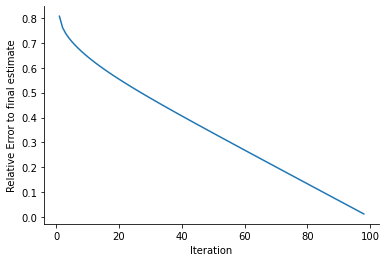

In [3]:
error = np.linalg.norm(V_estimates[:,:k-1] -  np.tile(V_estimates[:, -1].reshape(-1, 1), (1, k-1)), axis=0)
plt.plot(np.arange(1, len(error)), error[1:] / np.max(error))
plt.ylabel('Relative Error to final estimate')
plt.xlabel('Iteration')
sns.despine()

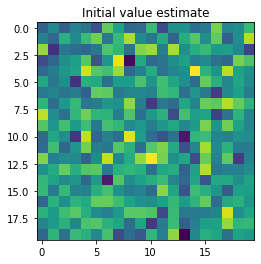

In [4]:
plt.imshow(V_estimates[:,0].reshape(n_rows, n_columns), cmap='viridis')
plt.title('Initial value estimate')
plt.show()

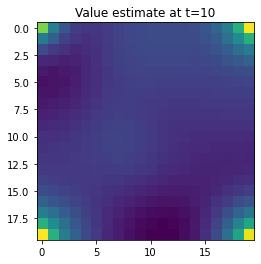

In [5]:
plt.imshow(V_estimates[:,10].reshape(n_rows, n_columns), cmap='viridis')
plt.title('Value estimate at t=10')
plt.show()

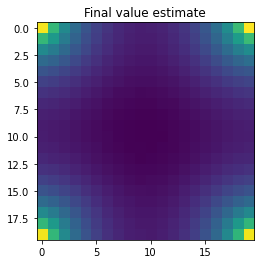

In [6]:
plt.title('Final value estimate')
plt.imshow(V_estimates[:,k-1].reshape(n_rows, n_columns), cmap='viridis')
plt.show()

# Example 2: 1D Diffusion with Reward on one end

In [13]:
# define the enviornment
n_rows, n_columns = 1, 10

sparse_diffusion_matrix = utils.make_diffision_transition_matrix(n_rows, n_columns, sparse=True)

tiling = utils.define_lattice_tiling(n_rows, n_columns,)

R = np.ones(n_rows * n_columns) * 0
gamma = 0.95
R[0] = 1.0


V_a = np.random.randn(R.shape[0] // 2)
V_b = np.random.randn(R.shape[0] // 2)

k = 100
V_estimates = np.zeros((R.shape[0], k+1))
V_estimates[tiling, 0] = V_a
V_estimates[~tiling, 0] = V_b


# dynamic programming algorithm
for ii in range(1, k+1):
    V_a =  R[tiling] + sparse_diffusion_matrix[tiling][:, ~tiling].dot(V_b)
    V_b =  R[~tiling] + sparse_diffusion_matrix[~tiling][:, tiling].dot(V_a)

    # save reward functions for measurements
    V_estimates[tiling, ii] = V_a
    V_estimates[~tiling, ii] = V_b

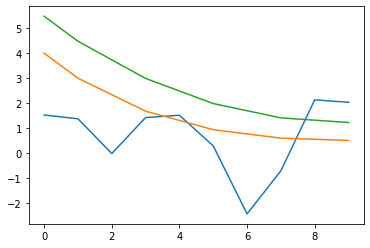

In [17]:
plt.plot(V_estimates[:, 0])
plt.plot(V_estimates[:, 10])
plt.plot(V_estimates[:, 20])



# plt.title('Initial value estimate')
# plt.show()